In [1]:
import pandas as pd

## Notes
- item_zip column should affect delivery date
- difference between buyer_zip and item_zip should affect **shipping_fee** and **delivery date**
- can combine **item_price**, **quantity**  and **shipping_fee** in a new column, **price**
- convert weight units to kg's and drop it
- groupby seller_id (shouldn't item_zip be same per seller_id?)

In [46]:
df = pd.read_csv('eBay_ML_Challenge_Dataset_2021_train.tsv', sep='\t')

In [2]:
ef = pd.read_csv('eBay_ML_Challenge_Dataset_2021_quiz.tsv', sep='\t')

In [3]:
ef.shape

(2500000, 19)

## seller_id is primary key (grouping sellers)
**record number** is the primary key

In [4]:
df.weight_units.value_counts()

In [48]:
def convertToLB(inputDf):
    if(inputDf['weight_units'] == 2):
        return inputDf['weight'] / 0.453592
    else:
        return inputDf['weight']
df['new_weight'] = df.apply(convertToLB, axis = 1)
df.head(10)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,weight,weight_units,package_size,record_number,new_weight
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.00,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,5,1,LETTER,1,5.0
1,C2C,6727381,2.0,2018-06-02 12:53:00.000-07:00,0,3.00,3,5,11415-3528,62521,0,20.50,1,2018-06-01 13:43:54.000-07:00,2018-06-05,0,1,PACKAGE_THICK_ENVELOPE,2,0.0
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.50,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,9,1,PACKAGE_THICK_ENVELOPE,3,9.0
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.00,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,8,1,PACKAGE_THICK_ENVELOPE,4,8.0
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.00,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,3,1,PACKAGE_THICK_ENVELOPE,5,3.0
5,B2C,10514,1.0,2019-04-19 19:42:00.000-04:00,0,0.00,3,5,43215,77063,3,10.39,1,2019-04-18 14:11:09.000-04:00,2019-04-22,1,1,PACKAGE_THICK_ENVELOPE,6,1.0
6,B2C,104,1.0,2019-02-08 17:35:00.000-08:00,0,0.00,3,5,91304,60565,11,5.70,1,2019-02-08 09:33:13.000-08:00,2019-02-11,0,1,PACKAGE_THICK_ENVELOPE,7,0.0
7,B2C,340356,1.0,2018-04-23 17:31:00.000-04:00,0,2.95,3,5,49735,29379,1,6.00,1,2018-04-22 18:32:04.000-04:00,2018-04-25,1,1,PACKAGE_THICK_ENVELOPE,8,1.0
8,B2C,113915,5.0,2019-10-12 09:22:00.000-04:00,3,0.00,2,8,43606,32958,18,5.55,1,2019-10-11 04:54:25.000-04:00,2019-10-15,0,1,NONE,9,0.0
9,B2C,130301,1.0,2019-08-09 11:24:00.000-05:00,1,0.00,2,5,35117,84776,13,59.98,1,2019-08-08 12:47:14.000-05:00,2019-08-12,112,1,PACKAGE_THICK_ENVELOPE,10,112.0


In [6]:
# def lengthZipCodes(data):
#     if(isinstance(data, str)):
#         return len(data)
#     return data
# df['zipcode_len'] = df['item_zip'].apply(lengthZipCodes)
# df.zipcode_len.value_counts()

In [7]:
# df['zipcode_len2'] = df['buyer_zip'].apply(lengthZipCodes)
# df.zipcode_len2.value_counts()

In [8]:
# df = df.drop(['zipcode_len', 'zipcode_len2'], axis=1)

In [49]:
df = df[df['item_zip'].str.len() == 5.0]
df = df[df['buyer_zip'].str.len() == 5.0]
print(df.shape)
df = df[df['item_zip'].str.isdigit()]
df = df[df['buyer_zip'].str.isdigit()]
print(df.shape)

(14598430, 20)
(14598422, 20)


In [10]:
# df.groupby('seller_id')['item_zip'].value_counts()

In [11]:
# df.groupby(['item_zip', 'buyer_zip', 'package_size'])['shipping_fee'].value_counts()

In [12]:
# df.item_zip.value_counts()

In [13]:
# df.head(10)

In [50]:
df = df.drop('weight', axis=1)
df = df.drop('weight_units', axis=1)

In [51]:
def findPrice(inputDf):
    return (inputDf['item_price'] * inputDf['quantity']) + inputDf['shipping_fee']
df['FinalCost'] = df.apply(findPrice, axis = 1)
df.head(10)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,package_size,record_number,new_weight,FinalCost
0,B2C,25454,3.0,2019-03-26 15:11:00.000-07:00,0,0.00,3,5,97219,49040,13,27.95,1,2019-03-24 03:56:49.000-07:00,2019-03-29,LETTER,1,5.0,27.95
2,B2C,18507,1.0,2019-01-07 16:22:00.000-05:00,0,4.50,3,5,27292,53010,1,19.90,1,2019-01-06 00:02:00.000-05:00,2019-01-10,PACKAGE_THICK_ENVELOPE,3,9.0,24.40
3,B2C,4677,1.0,2018-12-17 16:56:00.000-08:00,0,0.00,3,5,90703,80022,1,35.50,1,2018-12-16 10:28:28.000-08:00,2018-12-21,PACKAGE_THICK_ENVELOPE,4,8.0,35.50
4,B2C,4677,1.0,2018-07-27 16:48:00.000-07:00,0,0.00,3,5,90703,55070,1,25.00,1,2018-07-26 18:20:02.000-07:00,2018-07-30,PACKAGE_THICK_ENVELOPE,5,3.0,25.00
5,B2C,10514,1.0,2019-04-19 19:42:00.000-04:00,0,0.00,3,5,43215,77063,3,10.39,1,2019-04-18 14:11:09.000-04:00,2019-04-22,PACKAGE_THICK_ENVELOPE,6,1.0,10.39
6,B2C,104,1.0,2019-02-08 17:35:00.000-08:00,0,0.00,3,5,91304,60565,11,5.70,1,2019-02-08 09:33:13.000-08:00,2019-02-11,PACKAGE_THICK_ENVELOPE,7,0.0,5.70
7,B2C,340356,1.0,2018-04-23 17:31:00.000-04:00,0,2.95,3,5,49735,29379,1,6.00,1,2018-04-22 18:32:04.000-04:00,2018-04-25,PACKAGE_THICK_ENVELOPE,8,1.0,8.95
8,B2C,113915,5.0,2019-10-12 09:22:00.000-04:00,3,0.00,2,8,43606,32958,18,5.55,1,2019-10-11 04:54:25.000-04:00,2019-10-15,NONE,9,0.0,5.55
9,B2C,130301,1.0,2019-08-09 11:24:00.000-05:00,1,0.00,2,5,35117,84776,13,59.98,1,2019-08-08 12:47:14.000-05:00,2019-08-12,PACKAGE_THICK_ENVELOPE,10,112.0,59.98
10,B2C,206,1.0,2019-04-02 19:42:00.000-07:00,0,0.00,3,5,93309,20774,12,9.64,1,2019-03-31 06:58:25.000-07:00,2019-04-04,PACKAGE_THICK_ENVELOPE,11,7.0,9.64


In [52]:
def convertToGMT(data):
    a = data[len(data)-6:]
    b = data[:len(data)-6]
    if(a[0]=='-' or a[0]=='+'):
        timeObject = pd.Timestamp(b, tz = a)
    else:
        timeObject = pd.Timestamp(data)
    return timeObject.tz_convert(tz='UTC')

In [54]:
df = df[df.carrier_min_estimate > 0]
df = df[df.carrier_max_estimate > 0]
df = df[df.declared_handling_days.notna()]
df = df[df.package_size != 'NONE']
df = df[df.new_weight > 0]
df.acceptance_scan_timestamp = df.acceptance_scan_timestamp.apply(convertToGMT)
df.payment_datetime = df.payment_datetime.apply(convertToGMT)

In [55]:
import datetime as dt
df.delivery_date = pd.to_datetime(df.delivery_date)
df.delivery_date = df.delivery_date.map(dt.datetime.toordinal)
df.acceptance_scan_timestamp = df.acceptance_scan_timestamp.map(dt.datetime.toordinal)
df.payment_datetime = df.payment_datetime.map(dt.datetime.toordinal)
# this converts it to a regression problem

In [56]:
# df.package_size.value_counts()

In [57]:
df.b2c_c2c = pd.Categorical(df.b2c_c2c).codes
df.package_size = pd.Categorical(df.package_size).codes
df.head(10)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,package_size,record_number,new_weight,FinalCost
0,0,25454,3.0,737144,0,0.00,3,5,97219,49040,13,27.95,1,737142,737147,3,1,5.0,27.95
2,0,18507,1.0,737066,0,4.50,3,5,27292,53010,1,19.90,1,737065,737069,4,3,9.0,24.40
3,0,4677,1.0,737046,0,0.00,3,5,90703,80022,1,35.50,1,737044,737049,4,4,8.0,35.50
4,0,4677,1.0,736902,0,0.00,3,5,90703,55070,1,25.00,1,736902,736905,4,5,3.0,25.00
5,0,10514,1.0,737168,0,0.00,3,5,43215,77063,3,10.39,1,737167,737171,4,6,1.0,10.39
7,0,340356,1.0,736807,0,2.95,3,5,49735,29379,1,6.00,1,736806,736809,4,8,1.0,8.95
9,0,130301,1.0,737280,1,0.00,2,5,35117,84776,13,59.98,1,737279,737283,4,10,112.0,59.98
10,0,206,1.0,737152,0,0.00,3,5,93309,20774,12,9.64,1,737149,737153,4,11,7.0,9.64
11,0,2101,1.0,736822,0,0.00,3,5,51031,28092,13,9.90,1,736821,736828,4,12,2.0,9.90
12,0,12924,1.0,736912,0,0.00,3,5,77035,45373,8,23.99,1,736912,736915,4,13,1.0,23.99


In [58]:
df.shape

(9440628, 19)

In [59]:
df = df[df['payment_datetime'] <= df['acceptance_scan_timestamp']]
df = df[df['acceptance_scan_timestamp'] < df['delivery_date']]

In [60]:
df.shape

(9349461, 19)

In [61]:
df.head(10)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,package_size,record_number,new_weight,FinalCost
0,0,25454,3.0,737144,0,0.00,3,5,97219,49040,13,27.95,1,737142,737147,3,1,5.0,27.95
2,0,18507,1.0,737066,0,4.50,3,5,27292,53010,1,19.90,1,737065,737069,4,3,9.0,24.40
3,0,4677,1.0,737046,0,0.00,3,5,90703,80022,1,35.50,1,737044,737049,4,4,8.0,35.50
4,0,4677,1.0,736902,0,0.00,3,5,90703,55070,1,25.00,1,736902,736905,4,5,3.0,25.00
5,0,10514,1.0,737168,0,0.00,3,5,43215,77063,3,10.39,1,737167,737171,4,6,1.0,10.39
7,0,340356,1.0,736807,0,2.95,3,5,49735,29379,1,6.00,1,736806,736809,4,8,1.0,8.95
9,0,130301,1.0,737280,1,0.00,2,5,35117,84776,13,59.98,1,737279,737283,4,10,112.0,59.98
10,0,206,1.0,737152,0,0.00,3,5,93309,20774,12,9.64,1,737149,737153,4,11,7.0,9.64
11,0,2101,1.0,736822,0,0.00,3,5,51031,28092,13,9.90,1,736821,736828,4,12,2.0,9.90
12,0,12924,1.0,736912,0,0.00,3,5,77035,45373,8,23.99,1,736912,736915,4,13,1.0,23.99


In [62]:
df.dtypes

b2c_c2c                         int8
seller_id                      int64
declared_handling_days       float64
acceptance_scan_timestamp      int64
shipment_method_id             int64
shipping_fee                 float64
carrier_min_estimate           int64
carrier_max_estimate           int64
item_zip                      object
buyer_zip                     object
category_id                    int64
item_price                   float64
quantity                       int64
payment_datetime               int64
delivery_date                  int64
package_size                    int8
record_number                  int64
new_weight                   float64
FinalCost                    float64
dtype: object

In [63]:
# columns that should be normalized
# declared_handling_days, shipping_fee, delivery_estimates, item_price, package_size, new_weight, final_cost

#### Normalizing columns

In [64]:
# df['declared_handling_days'] = (df['declared_handling_days'] - df['declared_handling_days'].min()) / (df['declared_handling_days'].max() - df['declared_handling_days'].min())
# df['shipping_fee'] = (df['shipping_fee'] - df['shipping_fee'].min()) / (df['shipping_fee'].max() - df['shipping_fee'].min())
# df['carrier_min_estimate'] = (df['carrier_min_estimate'] - df['carrier_min_estimate'].min()) / (df['carrier_min_estimate'].max() - df['carrier_min_estimate'].min())
# df['carrier_max_estimate'] = (df['carrier_max_estimate'] - df['carrier_max_estimate'].min()) / (df['carrier_max_estimate'].max() - df['carrier_max_estimate'].min())
# df['item_price'] = (df['item_price'] - df['item_price'].min()) / (df['item_price'].max() - df['item_price'].min())
# df['package_size'] = (df['package_size'] - df['package_size'].min()) / (df['package_size'].max() - df['package_size'].min())
# df['new_weight'] = (df['new_weight'] - df['new_weight'].min()) / (df['new_weight'].max() - df['new_weight'].min())
# df['FinalCost'] = (df['FinalCost'] - df['FinalCost'].min()) / (df['FinalCost'].max() - df['FinalCost'].min())

In [65]:
df['declared_handling_days'] = (df['declared_handling_days'] - df['declared_handling_days'].mean()) / (df['declared_handling_days'].std())
df['shipping_fee'] = (df['shipping_fee'] - df['shipping_fee'].mean()) / (df['shipping_fee'].std())
df['carrier_min_estimate'] = (df['carrier_min_estimate'] - df['carrier_min_estimate'].mean()) / (df['carrier_min_estimate'].std())
df['carrier_max_estimate'] = (df['carrier_max_estimate'] - df['carrier_max_estimate'].mean()) / (df['carrier_max_estimate'].std())
df['item_price'] = (df['item_price'] - df['item_price'].mean()) / (df['item_price'].std())
df['package_size'] = (df['package_size'] - df['package_size'].mean()) / (df['package_size'].std())
df['new_weight'] = (df['new_weight'] - df['new_weight'].mean()) / (df['new_weight'].std())
df['FinalCost'] = (df['FinalCost'] - df['FinalCost'].mean()) / (df['FinalCost'].std())

In [66]:
df.head(10)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,item_price,quantity,payment_datetime,delivery_date,package_size,record_number,new_weight,FinalCost
0,0,25454,0.938704,737144,0,-0.554614,0.779457,-0.344135,97219,49040,13,-0.077422,1,737142,737147,-1.921639,1,-0.044114,-0.109112
2,0,18507,-0.431249,737066,0,0.226713,0.779457,-0.344135,27292,53010,1,-0.157428,1,737065,737069,0.221656,3,-0.034185,-0.138681
3,0,4677,-0.431249,737046,0,-0.554614,0.779457,-0.344135,90703,80022,1,-0.002385,1,737044,737049,0.221656,4,-0.036667,-0.046224
4,0,4677,-0.431249,736902,0,-0.554614,0.779457,-0.344135,90703,55070,1,-0.106741,1,736902,736905,0.221656,5,-0.049078,-0.133684
5,0,10514,-0.431249,737168,0,-0.554614,0.779457,-0.344135,43215,77063,3,-0.251944,1,737167,737171,0.221656,6,-0.054042,-0.255377
7,0,340356,-0.431249,736807,0,-0.042411,0.779457,-0.344135,49735,29379,1,-0.295575,1,736806,736809,0.221656,8,-0.054042,-0.267371
9,0,130301,-0.431249,737280,1,-0.554614,-1.278152,-0.344135,35117,84776,13,0.240912,1,737279,737283,0.221656,10,0.221473,0.157681
10,0,206,-0.431249,737152,0,-0.554614,0.779457,-0.344135,93309,20774,12,-0.259398,1,737149,737153,0.221656,11,-0.039149,-0.261624
11,0,2101,-0.431249,736822,0,-0.554614,0.779457,-0.344135,51031,28092,13,-0.256814,1,736821,736828,0.221656,12,-0.051560,-0.259458
12,0,12924,-0.431249,736912,0,-0.554614,0.779457,-0.344135,77035,45373,8,-0.116779,1,736912,736915,0.221656,13,-0.054042,-0.142096


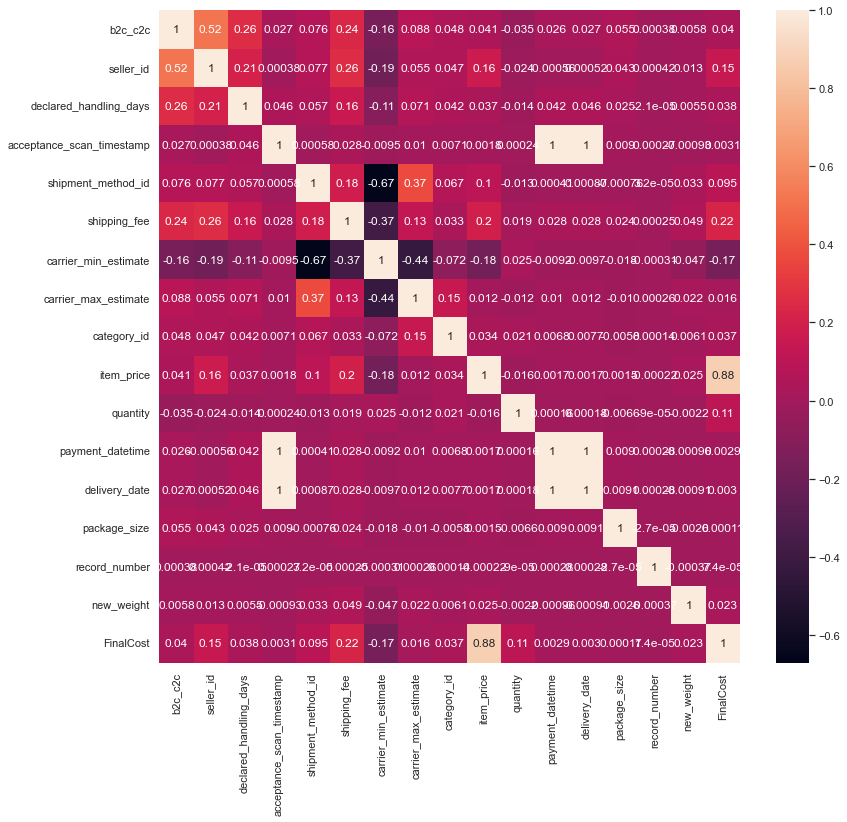

In [67]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(rc={'figure.figsize':(13,12)})

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [68]:
# abs(df.corr()) > 0.75

In [69]:
df = df.drop('item_price', axis=1)
# df = df.drop('acceptance_scan_timestamp', axis=1)
# df.dtypes

In [70]:
df = df.drop('item_zip', axis=1)
df = df.drop('buyer_zip', axis=1)

In [71]:
df.columns

Index(['b2c_c2c', 'seller_id', 'declared_handling_days',
       'acceptance_scan_timestamp', 'shipment_method_id', 'shipping_fee',
       'carrier_min_estimate', 'carrier_max_estimate', 'category_id',
       'quantity', 'payment_datetime', 'delivery_date', 'package_size',
       'record_number', 'new_weight', 'FinalCost'],
      dtype='object')

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
X = df.drop('delivery_date', axis=1)
y = df['delivery_date']

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X)

regressor = LinearRegression()
regressor.fit(X_pca,y)

LinearRegression()

In [ ]:
# from sklearn.neural_network import MLPRegressor
# regr = MLPRegressor(random_state=1, max_iter=500).fit(X, y)

In [ ]:
# from sklearn.linear_model import LinearRegression
# X = df.drop('delivery_date', axis=1)
# y = df['delivery_date']
# from sklearn.svm import SVR
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
# regr.fit(X,y)

In [75]:
# ef.acceptance_scan_timestamp = ef.acceptance_scan_timestamp.apply(convertToGMT)
# ef.payment_datetime = ef.payment_datetime.apply(convertToGMT)
# ef.acceptance_scan_timestamp = ef.acceptance_scan_timestamp.map(dt.datetime.toordinal)
# ef.payment_datetime = ef.payment_datetime.map(dt.datetime.toordinal)

ef['new_weight'] = ef.apply(convertToLB, axis = 1)
ef = ef.drop('weight', axis=1)
ef = ef.drop('weight_units', axis=1)
ef['FinalCost'] = ef.apply(findPrice, axis = 1)
ef = ef.drop('item_price', axis=1)

ef.b2c_c2c = pd.Categorical(ef.b2c_c2c).codes
ef.package_size = pd.Categorical(ef.package_size).codes
ef.head(10)

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,item_zip,buyer_zip,category_id,quantity,payment_datetime,delivery_date,package_size,record_number,new_weight,FinalCost
0,0,260031,1.0,737378,0,0.00,3,5,84116,34788,2,1,737377,NaN,4,15000001,4.0,28.00
1,0,4854,1.0,737391,0,0.00,3,5,04901,54904,9,1,737389,NaN,4,15000002,13.0,9.95
2,0,1987,1.0,737396,0,0.00,3,5,90015,80918,2,1,737395,NaN,4,15000003,6.0,16.25
3,0,43799,1.0,737408,0,0.00,3,5,04007,49036,16,1,737405,NaN,4,15000004,4.0,13.65
4,0,3660,0.0,737412,0,0.00,3,5,95841,74074,1,1,737412,NaN,0,15000005,2.0,13.99
5,1,658827,1.0,737392,0,0.00,3,5,54009,21403,18,1,737391,NaN,4,15000006,0.0,575.00
6,0,1262,1.0,737417,1,0.00,2,5,99336,77407,0,1,737413,NaN,4,15000007,32.0,21.00
7,0,48201,1.0,737381,0,4.25,3,5,22601,34711,3,1,737380,NaN,4,15000008,15.0,21.21
8,0,82917,1.0,737419,1,13.40,2,5,10305,08512,3,1,737405,NaN,4,15000009,64.0,31.39
9,0,4208,1.0,737416,1,0.00,2,5,06810,32008,1,1,737416,NaN,3,15000010,25.0,9.56


In [76]:
ef['declared_handling_days'] = (ef['declared_handling_days'] - ef['declared_handling_days'].mean()) / (ef['declared_handling_days'].std())
ef['shipping_fee'] = (ef['shipping_fee'] - ef['shipping_fee'].mean()) / (ef['shipping_fee'].std())
ef['carrier_min_estimate'] = (ef['carrier_min_estimate'] - ef['carrier_min_estimate'].mean()) / (ef['carrier_min_estimate'].std())
ef['carrier_max_estimate'] = (ef['carrier_max_estimate'] - ef['carrier_max_estimate'].mean()) / (ef['carrier_max_estimate'].std())
# ef['item_price'] = (ef['item_price'] - ef['item_price'].mean()) / (ef['item_price'].std())
ef['package_size'] = (ef['package_size'] - ef['package_size'].mean()) / (ef['package_size'].std())
ef['new_weight'] = (ef['new_weight'] - ef['new_weight'].mean()) / (ef['new_weight'].std())
ef['FinalCost'] = (ef['FinalCost'] - ef['FinalCost'].mean()) / (ef['FinalCost'].std())

In [77]:
ef = ef.drop('item_zip', axis=1)
ef = ef.drop('buyer_zip', axis=1)
# ef = ef.drop('payment_datetime', axis=1)
# ef = ef.drop('acceptance_scan_timestamp', axis=1)

X_hat = ef.drop('delivery_date', axis=1)
X_hat.fillna(0, inplace=True)

In [78]:
X.columns

Index(['b2c_c2c', 'seller_id', 'declared_handling_days',
       'acceptance_scan_timestamp', 'shipment_method_id', 'shipping_fee',
       'carrier_min_estimate', 'carrier_max_estimate', 'category_id',
       'quantity', 'payment_datetime', 'package_size', 'record_number',
       'new_weight', 'FinalCost'],
      dtype='object')

In [79]:
X_hat.columns

Index(['b2c_c2c', 'seller_id', 'declared_handling_days',
       'acceptance_scan_timestamp', 'shipment_method_id', 'shipping_fee',
       'carrier_min_estimate', 'carrier_max_estimate', 'category_id',
       'quantity', 'payment_datetime', 'package_size', 'record_number',
       'new_weight', 'FinalCost'],
      dtype='object')

In [80]:
X_hat_pca = pca.fit_transform(X_hat)

y_hat = regressor.predict(X_hat_pca)
# y_hat_NN = regr.predict(X_hat)
# y_hat_rf = rfRegressor.predict(X_hat)
ef['delivery_date'] = y_hat
# ef['delivery_date'] = y_hat_rf
ef['delivery_date'] = ef.delivery_date.round().astype(int)

In [81]:
ef

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,category_id,quantity,payment_datetime,delivery_date,package_size,record_number,new_weight,FinalCost
0,0,260031,-0.453800,737378,0,-0.530542,0.792757,-0.381791,2,1,737377,737018,0.352533,15000001,-0.232583,-0.086875
1,0,4854,-0.453800,737391,0,-0.530542,0.792757,-0.381791,9,1,737389,737032,0.352533,15000002,-0.058690,-0.187545
2,0,1987,-0.453800,737396,0,-0.530542,0.792757,-0.381791,2,1,737395,737036,0.352533,15000003,-0.193940,-0.152408
3,0,43799,-0.453800,737408,0,-0.530542,0.792757,-0.381791,16,1,737405,737049,0.352533,15000004,-0.232583,-0.166909
4,0,3660,-1.130725,737412,0,-0.530542,0.792757,-0.381791,1,1,737412,737052,-5.128892,15000005,-0.271226,-0.165013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,0,346,-0.453800,737413,0,-0.530542,0.792757,-0.381791,10,1,737412,737053,0.352533,17499996,-0.155297,-0.200039
2499996,0,98631,0.223125,737399,0,0.205405,0.792757,-0.381791,4,1,737397,737039,0.352533,17499997,-0.155297,-0.129374
2499997,0,3466,-0.453800,737399,5,-0.530542,-1.253589,-0.381791,9,2,737398,737039,0.352533,17499998,0.501635,0.138449
2499998,1,170535,0.900050,737403,0,-0.530542,0.792757,-0.381791,22,1,737400,737044,0.352533,17499999,-0.213262,-0.131493


In [82]:
ef['delivery_date'] = ef.delivery_date.map(dt.datetime.fromordinal)
# ef['acceptance_scan_timestamp'] = ef.acceptance_scan_timestamp.map(dt.datetime.fromordinal)
# ef['payment_datetime'] = ef.payment_datetime.map(dt.datetime.fromordinal)

In [83]:
ef

,b2c_c2c,seller_id,declared_handling_days,acceptance_scan_timestamp,shipment_method_id,shipping_fee,carrier_min_estimate,carrier_max_estimate,category_id,quantity,payment_datetime,delivery_date,package_size,record_number,new_weight,FinalCost
0,0,260031,-0.453800,737378,0,-0.530542,0.792757,-0.381791,2,1,737377,2018-11-20,0.352533,15000001,-0.232583,-0.086875
1,0,4854,-0.453800,737391,0,-0.530542,0.792757,-0.381791,9,1,737389,2018-12-04,0.352533,15000002,-0.058690,-0.187545
2,0,1987,-0.453800,737396,0,-0.530542,0.792757,-0.381791,2,1,737395,2018-12-08,0.352533,15000003,-0.193940,-0.152408
3,0,43799,-0.453800,737408,0,-0.530542,0.792757,-0.381791,16,1,737405,2018-12-21,0.352533,15000004,-0.232583,-0.166909
4,0,3660,-1.130725,737412,0,-0.530542,0.792757,-0.381791,1,1,737412,2018-12-24,-5.128892,15000005,-0.271226,-0.165013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499995,0,346,-0.453800,737413,0,-0.530542,0.792757,-0.381791,10,1,737412,2018-12-25,0.352533,17499996,-0.155297,-0.200039
2499996,0,98631,0.223125,737399,0,0.205405,0.792757,-0.381791,4,1,737397,2018-12-11,0.352533,17499997,-0.155297,-0.129374
2499997,0,3466,-0.453800,737399,5,-0.530542,-1.253589,-0.381791,9,2,737398,2018-12-11,0.352533,17499998,0.501635,0.138449
2499998,1,170535,0.900050,737403,0,-0.530542,0.792757,-0.381791,22,1,737400,2018-12-16,0.352533,17499999,-0.213262,-0.131493


In [84]:
final = ef[['record_number', 'delivery_date']]
final.record_number = final.record_number.apply(lambda x: int(x))
final.delivery_date = final.delivery_date.dt.strftime('%Y-%m-%d')
final.shape

/Users/kushagraagrawal/anaconda3/envs/napari-env/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(2500000, 2)

In [85]:
final.to_csv('eval_1.tsv.gz', sep='\t', index=False, header=False, compression='gzip')